In [1]:
import numpy as np
import matplotlib.pyplot as plt

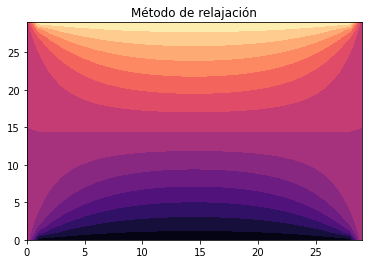

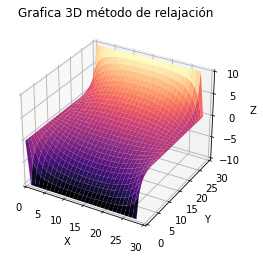

In [2]:
#método de relajación
#Codigo guía: https://www.codeproject.com/Articles/1087025/Using-Python-to-Solve-Computational-Physics-Proble de Garbel Nervadof

#dimensiones
lenX = lenY = 30
delta = 1

#Condiciones de frontera 
Ymaximo= 10
Yminimo=-10
Xderecha= 0
Xizquierda =0
#establecemos el meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Establecemos el valor de la matriz
matriz = np.empty((lenX, lenY))
matriz.fill(50)

# establecemos las condiciones de frontera para la matriz
matriz[(lenY-1):, :] = Ymaximo
matriz[:1, :] = Yminimo
matriz[:, (lenX-1):] = Xderecha
matriz[:, :1] = Xizquierda

#realizamos las iteraciones con la formula que hallamos en el punto 2
for promedio_valores in range(0, 800):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            matriz[i, j] = (1/4) * (matriz[i+1][j] + matriz[i-1][j] + matriz[i][j+1] + matriz[i][j-1])



# gráfica 2D
plt.title("Método de relajación")
plt.contourf(X, Y, matriz, 15, cmap=plt.cm.magma)
plt.show()

# grafica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, matriz, cmap='magma')
ax.set_title('Grafica 3D método de relajación')

# limites de los ejes
ax.set_xlim(0, lenX)
ax.set_ylim(0, lenY)
ax.set_zlim(Yminimo, Ymaximo)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()


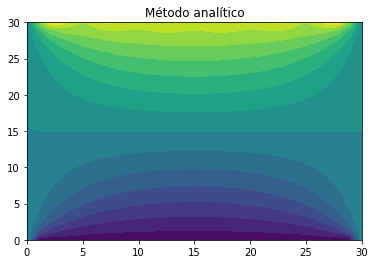

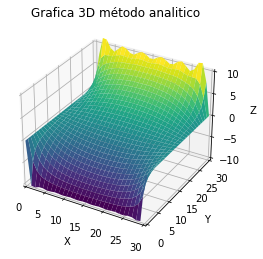

In [3]:
#método analítico
#definimos las dimensiones y el salto o delta
M=N=30
d= 1
a=N*d
b=M*d
x=np.linspace(0,a,N)
y=np.linspace(0,b,M)
X,Y=np.meshgrid(x,y)

#funcion para la solución analítica
def analitico(x,y,a,b,v0):
    X,Y=np.meshgrid(x,y)
    v_tem=np.zeros_like(X)

    for n in range(1,100,2):
        B_n=(1/(np.tanh((n*np.pi*b)/a)))+(1/(np.sinh((n*np.pi*b)/a)))
        v_tem += ((np.sin((n*np.pi*X)/a))/n)*(B_n*np.sinh((n*np.pi*Y)/a)-np.cosh((n*np.pi*Y)/a))

        
    return (4*v0/np.pi)*v_tem

V=analitico(x,y,a,b,10)

#Grafico en 2D
plt.title("Método analítico")
plt.contourf(x, y, V, 20, cmap=plt.cm.viridis)
plt.show()

print("")

# grafica 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, V, cmap='viridis')
ax.set_title('Grafica 3D método analitico')
# limites de los ejes
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_zlim(-10, 10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()

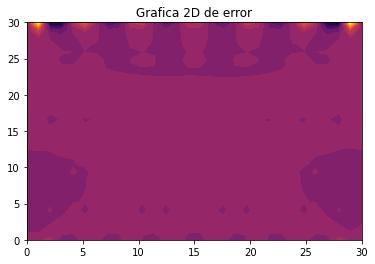

Text(0.5, 0, 'Z')

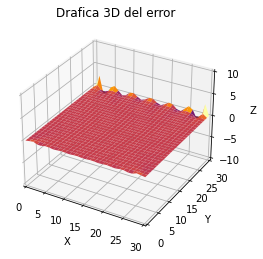

In [4]:
#Calculo de error 

#Grafica 2d, restamos ambas matrices de cada metodo para obtene la grafica
plt.title("Grafica 2D de error")
plt.contourf(x, y, matriz-V, 20, cmap=plt.cm.inferno)

# Show the result in the plot window
plt.show()

print("")
# grafica 3D restamos ambas matrices de cada metodo para obtene la grafica
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, matriz-V, cmap='inferno')
ax.set_title('Drafica 3D del error')

# limites de los ejes
ax.set_xlim(0, 30)
ax.set_ylim(0, 30)
ax.set_zlim(-10, 10)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')